<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar100
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar100.load_data()

class_names = ['beaver','dolphin','otter','seal','whale','aquarium fish', 'flatfish', 'ray', 'shark', 'trout','orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'bottles', 'bowls', 'cans', 'cups', 'plates',	'apples', 'mushrooms', 'oranges', 'pears',' sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone',
               'television','bed', 'chair', 'couch', 'table', 'wardrobe',	'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',	'bear', 'leopard', 'lion', 'tiger', 'wolf',
               	'bridge', 'castle', 'house', 'road', 'skyscraper',	'cloud', 'forest', 'mountain', 'plain', 'sea',	'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
               'fox', 'porcupine', 'possum', 'raccoon', 'skunk',	'crab', 'lobster', 'snail', 'spider', 'worm',	'baby', 'boy', 'girl', 'man', 'woman',	'crocodile', 
               'dinosaur', 'lizard', 'snake', 'turtle','hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',	'maple', 'oak', 'palm', 'pine', 'willow','bicycle', 'bus',
               'motorcycle', 'pickup truck', 'train','lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

class_names[2]
print(class_names[2])
print(x_train.shape)
print(x_test.shape)

otter
(50000, 32, 32, 3)
(10000, 32, 32, 3)


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


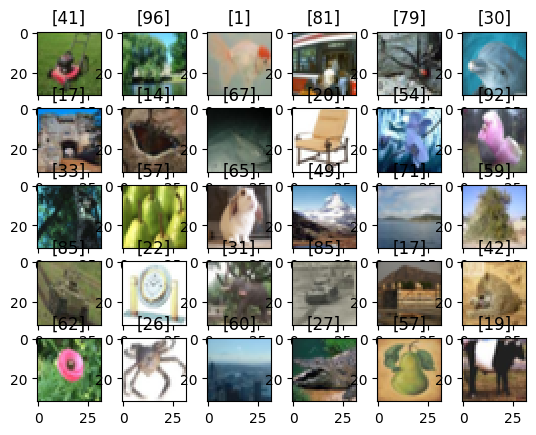

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[500+i])
  plt.title(y_train[500+i])
plt.show()

In [ ]:
x_train = x_train.reshape(50000,32*32*3)
x_test = x_test.reshape(10000,32*32*3)
x_train,x_test = x_train/255.0 , x_test/255.0

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import keras.metrics 

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model = Sequential()

model.add(Dense(500,activation='relu',input_shape = (32*32*3,)))
# model.add(Dense(256,activation='relu',input_shape = (32*32*3,)))
# model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
Total params: 1,716,900
Trainable params: 1,716,900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 20s 13ms/step - loss: 4.2159 - accuracy: 0.0644
Epoch 2/30
1563/1563 [==============================] - 18s 12ms/step - loss: 3.8367 - accuracy: 0.1195
Epoch 3/30
1563/1563 [==============================] - 18s 12ms/step - loss: 3.6781 - accuracy: 0.1491
Epoch 4/30
1563/1563 [==============================] - 20s 13ms/step - loss: 3.5762 - accuracy: 0.1680
Epoch 5/30
1563/1563 [==============================] - 18s 12ms/step - loss: 3.4961 - accuracy: 0.1829
Epoch 6/30
1563/1563 [==============================] - 18s 12ms/step - loss: 3.4267 - accuracy: 0.1958
Epoch 7/30
1563/1563 [==============================] - 20s 13ms/step - loss: 3.3654 - accuracy: 0.2056
Epoch 8/30
1563/1563 [==============================] - 19s 12ms/step - loss: 3.3113 - accuracy: 0.2142
Epoch 9/30
1563/1563 [==============================] - 18s 12ms/step - loss: 3.2575 - accuracy: 0.2257
Epoch 10/30
1563/1563 [==============================] - 19s 12m

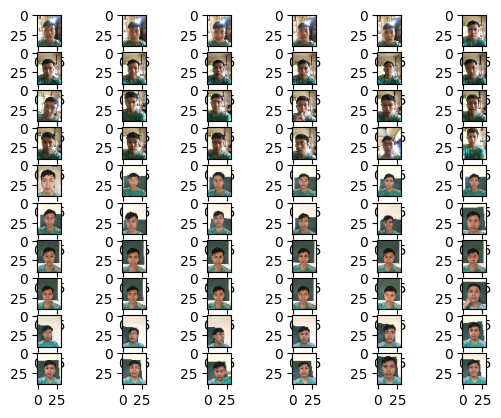

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

folder = '/content/drive/MyDrive/Picture_resized'

for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + '/' + 'nhn'+str(i+1)+'.jpg'
  img = imread(filename)
  plt.imshow(img)
plt.show()


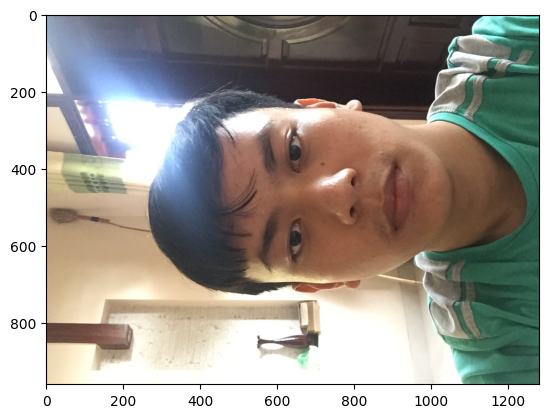

In [ ]:
folder = '/content/drive/MyDrive/Pictures'
filename = folder + '/' + 'IMG_'+str(3031)+'.JPG'
img = imread(filename)
plt.imshow(img)
plt.show()

In [ ]:
from numpy.ma.core import asarray
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/Picture_resized/'
photo,label = list(),list()

for file in listdir(folder):
  output = 0.0
  # neu file co 'nhn' 
  if file.startswith('nhn'):
    output = 1
  # neu file co '...'
  if file.startswith('IMG'):
    output = 2
  
  img = load_img(folder + file)
  photo = img_to_array(img)
  photo.append(photo)
  label.append(output)

photo = asarray(photo)
label = asarray(label)
print(photo.shape, label.shape)
save('/content/drive/MyDrive/Pictures/nhn_IMG_photo.npy',photo)
save('/content/drive/MyDrive/Pictures/nhn_IMG_label.npy',label)

AttributeError: ignored

In [ ]:
import pandas as pd

data = pd.read_csv('/content/pi_diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
X = data.iloc[:,:8]
y = data.iloc[:,8]

print(X.shape,y.shape)

(767, 8) (767,)


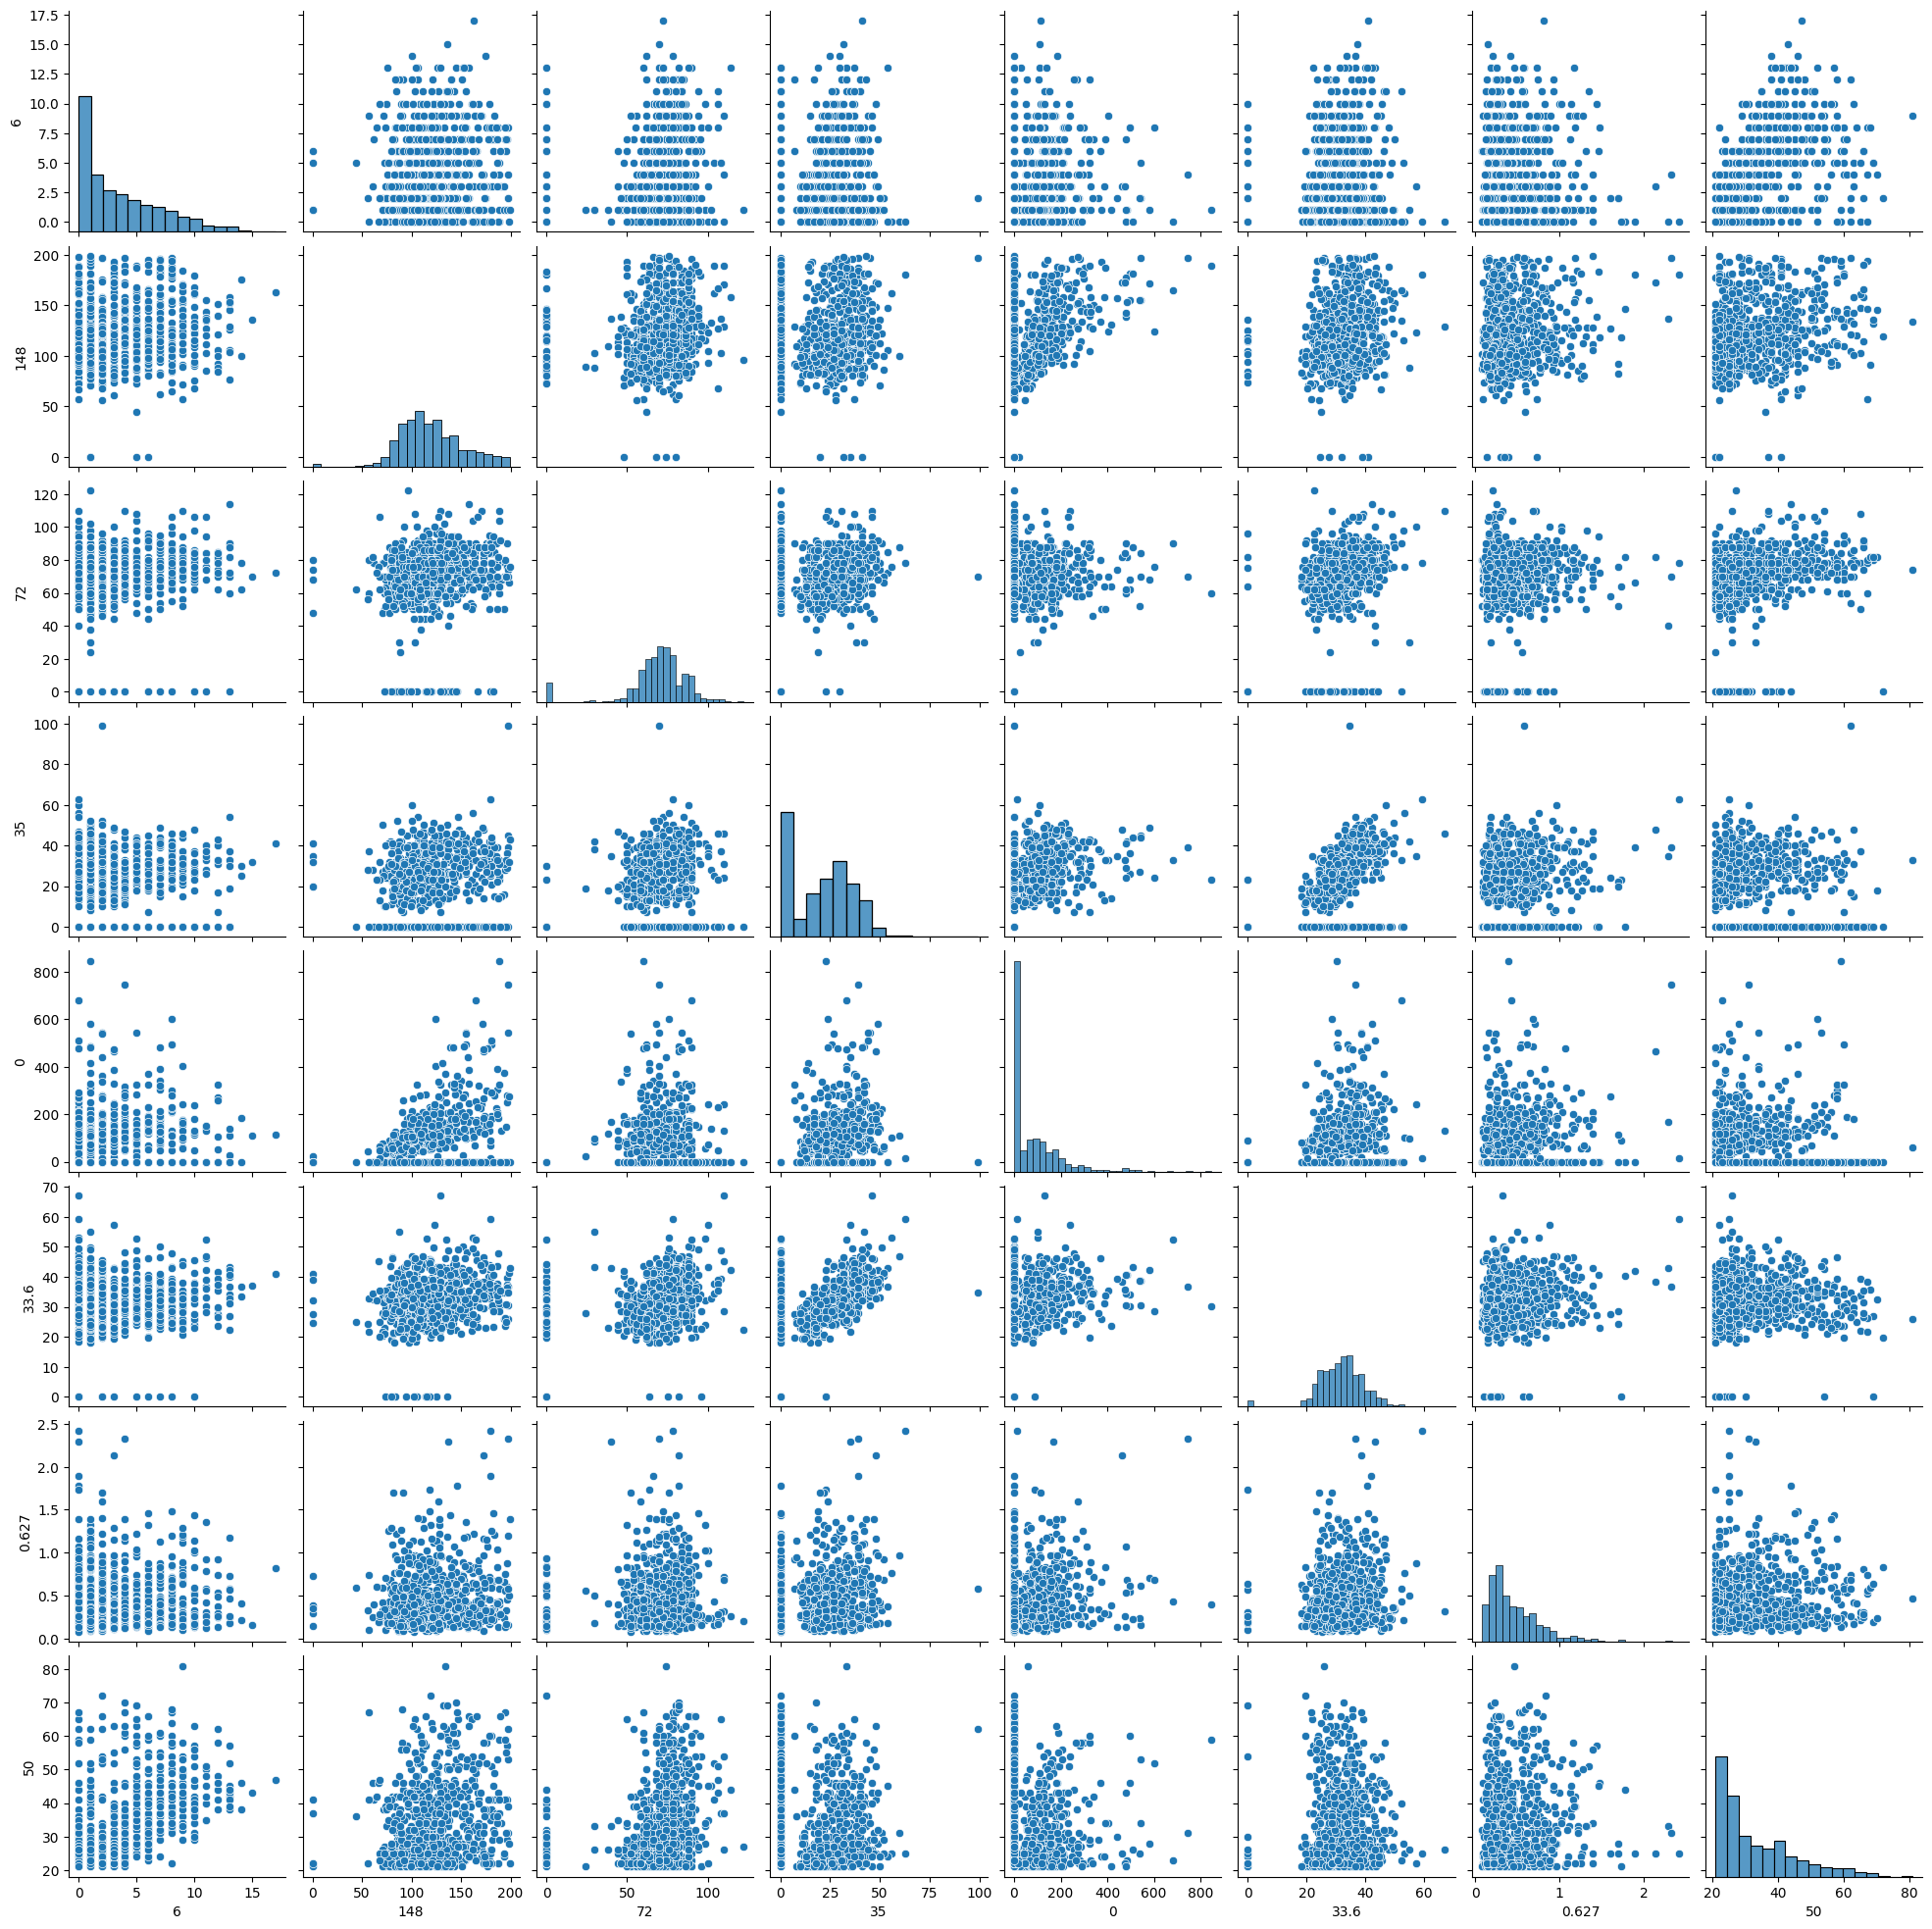

In [ ]:
import seaborn as sns
sns.pairplot(X)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12,activation='relu',input_shape=(8,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
model.fit(X,y,epochs=150,batch_size=10)
_,accuracy = model.evaluate(X,y)
print('do chinh xac: %2f' %(accuracy*100))

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 7.4795 - accuracy: 0.4628
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.7151 - accuracy: 0.6154
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2153 - accuracy: 0.6375
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9646 - accuracy: 0.6271
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8337 - accuracy: 0.6389
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.6467
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7244 - accuracy: 0.6441
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6728
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6480
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6767
Epoch 11/

In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

print(X.shape)


(767, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12,activation='relu',input_shape=(8,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
model.fit(X,y,epochs=500,batch_size=10)
_,accuracy = model.evaluate(X,y)
print('do chinh xac: %2f' %(accuracy*100))

Epoch 1/500
77/77 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.6480
Epoch 2/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6688
Epoch 3/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7158
Epoch 4/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7405
Epoch 5/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7458
Epoch 6/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7562
Epoch 7/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7601
Epoch 8/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7601
Epoch 9/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7614
Epoch 10/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7666
Epoch 11/